In [17]:
from astropy.io import fits
import numpy as np
import matplotlib.pyplot as plt
from astropy.convolution import convolve

In [2]:
hdulist = fits.open("../../gra/HAY_A_AMICA_3_HAYAMICA_V1_0/data/20050929/st_2418807291_p.fit")
hdu = hdulist[0]
data = hdu.data
header = hdu.header

filter = header["FILTER_0"]

In [7]:
conv_im = np.zeros((header["NAXIS1"],header["NAXIS2"]))
Ai = {"ul":{"1":12.0,"2":8.0,"3":1.2,"4":1.0,"5":0.8,"6":0.7},
      "b":{"1":10.0,"2":1.5,"3":0.3,"4":0.4,"5":0.4,"6":0.5},
      "v":{"1":10.0,"2":1.5,"3":0.3,"4":0.4,"5":0.4,"6":0.5},
      "w":{"1":10.0,"2":1.5,"3":0.6,"4":0.8,"5":0.7,"6":0.6},
      "x":{"1":9.0,"2":3.5,"3":2.0,"4":2.7,"5":2.2,"6":0.5},
      "p":{"1":10.0,"2":5.0,"3":8.3,"4":4.0,"5":6.4,"6":1.8},
      "zs":{"1":50.0,"2":16.0,"3":6.0,"4":9.0,"5":9.5,"6":4.5}
}
filter_u=Ai[filter]
sigma = [8,16,32,64,110,710]
fufoc = np.zeros((header["NAXIS1"],header["NAXIS2"]))
print(fufoc.shape)

(1024, 1024)


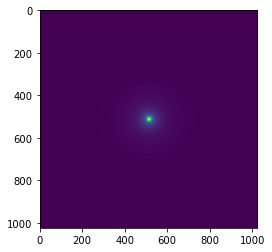

In [13]:
#Calculate fufoc
for x in range(header["NAXIS1"]):
    for y in range(header["NAXIS2"]):
        r = (np.sqrt(np.power(abs((header["NAXIS1"]/2)-x),2)+np.power(abs((header["NAXIS2"]/2)-y),2)))
        #r = np.sqrt(np.power(x,2)+np.power(y,2))
        for i in range(6):
            num = str(i + 1)
            fufoc[x][y] = fufoc[x][y] + ((filter_u[num]*np.power(10.,-4))/(np.sqrt(2*np.pi)*sigma[i]))*np.exp(-np.power(r,2)/(2*np.power(sigma[i],2)))

fig, ax = plt.subplots()
ax.imshow(fufoc)

In [14]:
hdu = fits.PrimaryHDU(fufoc)
hdulist = fits.HDUList([hdu])
hdulist.writeto('fufoc.fit',overwrite=True)

In [21]:

for x in range(header["NAXIS1"]):
    for y in range(header["NAXIS2"]):
        conv_im[x][y]=np.convolve(fufoc[x][y],data[x][y])


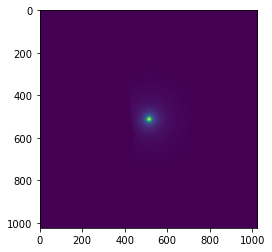

In [22]:
fig, ax = plt.subplots()
ax.imshow(conv_im)